[16:32:12] WARNING: not removing hydrogen atom without neighbors


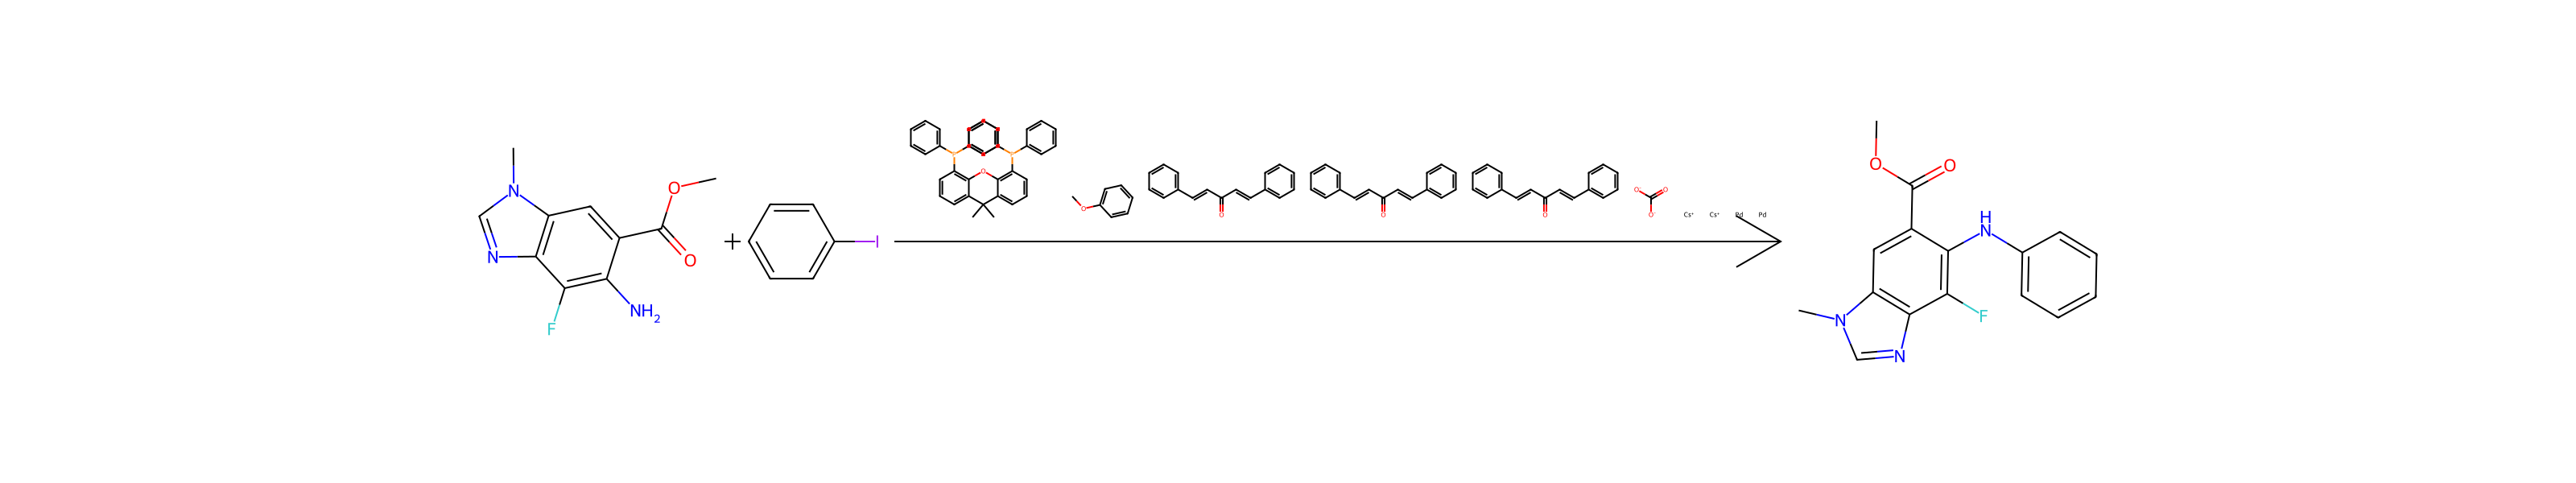

reaction_id,ord-1169cbe9fa064a879ac34b2e524a4e69
reaction_index,1
procedure,"{'conditions.temperature.setpoint.value': 100.0, 'conditions.temperature.setpoint.precision': 10.0, 'conditions.temperature.setpoint.units': 'CELSIUS', 'notes.procedure_details': '9,9-Dimethyl-4,5-bis(diphenylphosphino)xanthene (441 mg, 0.76 mmol) and Tris(dibenzylideneacetone)dipalladium(0) (279 mg, 0.30 mmol) were added to a round bottom flask which was evacuated and flushed with nitrogen 3 times, anisole (16.600 ml) was added and the mixture evacuated and flushed with nitrogen 3 times and then heated to 50ºC for 10 minutes. Cesium carbonate (6204 mg, 19.04 mmol), methyl 5-amino-4-fluoro-1-methyl-1H-benzo[d]imidazole-6-carboxylate (1700 mg, 7.62 mmol) and Iodobenzene (1.023 ml, 9.14 mmol) were stirred in anisole (33.2 ml), the flask was evacuated and flushed with nitrogen three times and then heated to 50ºC. The catalyst mixture was transferred into the flask with the reactants (by syringe) and the mixture heated to 100 °C for 18 hours. The reaction mixture was diluted with isohexane (60 ml) and the solid collected by filtration and washed with more isohexane (30 ml). The solid was slurried in DCM / MeOH and adsorbed onto silica then purified by flash silica chromatography eluting with 2% 3.7N NH3 / MeOH in DCM to give methyl 4-fluoro-1-methyl-5-(phenylamino)-1H-benzo[d]imidazole-6-carboxylate (1310 mg, 57.5 %) as a yellow solid. '}"
yields,"[{'product_smiles': 'COC(=O)c1cc2c(ncn2C)c(F)c1Nc1ccccc1', 'yield_percent': 57.470001220703125}]"


<class 'PIL.PngImagePlugin.PngImageFile'>


In [1]:
"""
Example usage of chemrxn-cleaner on a tiny in-memory dataset.

Run with:
    python examples/clean_data_example.py
"""

from __future__ import annotations
import json
from chemrxn_cleaner.loader import load_uspto_rsmi, load_ord_pb_reaction_smiles
from chemrxn_cleaner.extractor import ord_procedure_yields_meta
from chemrxn_cleaner.cleaning import clean_reactions
from chemrxn_cleaner.filters import default_filters, max_smiles_length, element_filter
from chemrxn_cleaner.reporting import summarize_cleaning
from chemrxn_cleaner.types import ElementFilterRule

# read uspto data from your local environment
# rxn_uspto = load_uspto_rsmi("/your_data_path/1976_Sep2016_USPTOgrants_smiles.rsmi")
# cleaned_rxn_uspto = clean_reactions(rxn_smiles_list=rxn_uspto, filters=[])
# clearning_report_uspto = summarize_cleaning(raw_reactions=rxn_uspto, cleaned_reactions=cleaned_rxn_uspto)


# read ORD (Open Reaction Database) data from your local environment
rxn_ord = load_ord_pb_reaction_smiles("/home/pyl/datasets/ord-data/data/00/ord_dataset-00005539a1e04c809a9a78647bea649c.pb.gz",
                                      meta_extractor=ord_procedure_yields_meta)
cleaned_rxn_ord = clean_reactions(rxn_smiles_list=rxn_ord, filters=[
    max_smiles_length(100),
    element_filter(
        forbidList=ElementFilterRule(["Cl", "Br"], [], [])
    )
])
report_ord = summarize_cleaning(raw_reactions=rxn_ord, cleaned_reactions=cleaned_rxn_ord)

img = cleaned_rxn_ord[0].show()
print(type(img))
# export results
# with open('output.txt', 'w') as f:
#     json.dump([rec.to_dict() for rec in cleaned_rxn_ord], f, indent=4) 
